In [1]:
import pandas as pd
import matplotlib.pyplot as plt  # To visualize
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import preprocessing, svm


# Read data from csv file 


In [2]:
# Datensatz von https://www.kaggle.com/lehaknarnauli/spotify-datasets?select=tracks.csv
df = pd.read_csv("tracks.csv")

# Preprocessing 

In [5]:
def label_encoding(df):
    encoder = preprocessing.LabelEncoder()
    df['name'] = encoder.fit_transform(df['name'])
    
    return df

df = label_encoding(df)

# Target encoding: encodiere mit durchschnittlicher Popularität des Artists
df['id_artists'] = df['id_artists'].map(df.groupby('id_artists')['popularity'].mean())


df[['year', 'month', 'day']] = df['release_date'].str.split('-', expand=True)
file_name = './preprocessed_tracks.csv'

# drop elemtents that are zero
df.dropna(axis=0, inplace=True)  
df.to_csv(file_name)

# Erklärung für die Features https://rstudio-pubs-static.s3.amazonaws.com/594440_b5a14885d559413ab6e57087eddd68e6.html
# Teilen von df in Daten die Algo sehen darf (X) und das Ergebnis (y)
x_features = ['explicit', 'danceability', 'energy', 'loudness',
              'speechiness', 'acousticness', 'instrumentalness', 'liveness',
              'valence', 'tempo', 'time_signature', 'name', 'id_artists', 'year', 'month', 'day','duration_ms', 'key', 'mode']

X = df[x_features].copy()

y_features = 'popularity'
y = df[y_features].copy()

for col in X.columns:
    X[col] = X[col].astype(float)
    X[col] = (X[col] - X[col].min()) / (X[col].max() - X[col].min())
      

# create heatmap

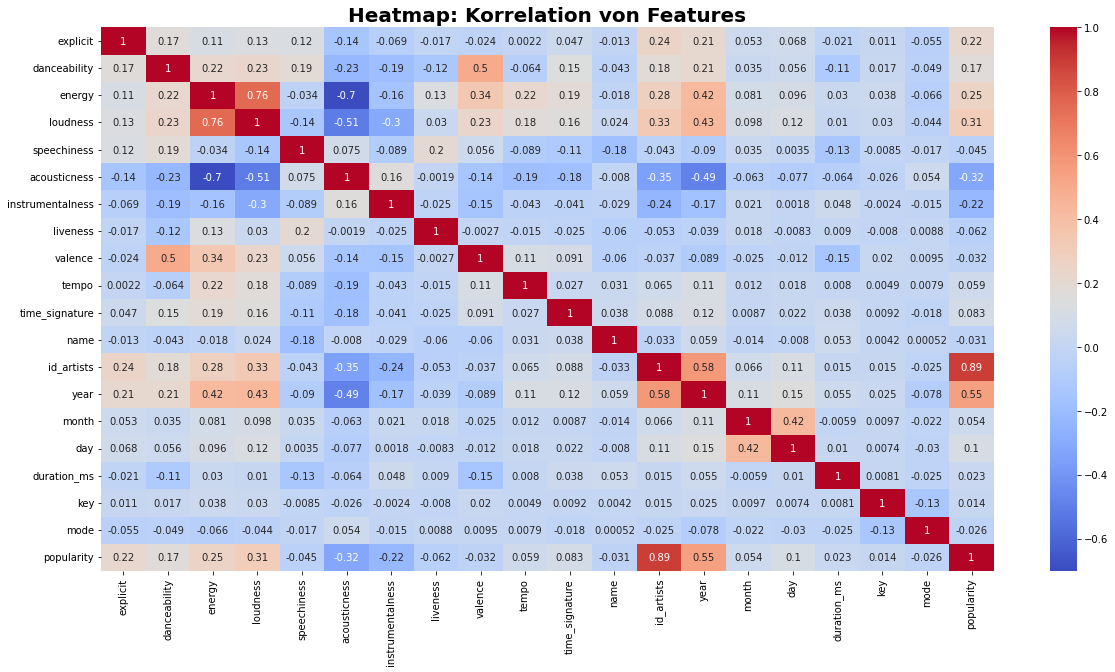

In [7]:
relevant_features = x_features
relevant_features.append('popularity')

heatmap_df = df[relevant_features]
heatmap_df.sample(frac=1)  # shuffle heatmap_df
heatmap_df = heatmap_df.apply(pd.to_numeric)
for col in heatmap_df.columns:
    heatmap_df[col] = (heatmap_df[col] - heatmap_df[col].min()) / (heatmap_df[col].max() - heatmap_df[col].min())
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(heatmap_df.corr(), cmap="coolwarm", annot=True)
plt.title("Heatmap: Korrelation von Features", fontsize=20, fontweight="bold")
figure = heatmap.get_figure()
figure.savefig('heatmap.png', dpi=500)



# Dimensions reduction

In [4]:
# Using result of heatmap and drop all features with correlation >-0,05 and <0,05
# drop: 'duration_ms', 'key', 'mode', 'valence','speechiness'

x_features = ['explicit', 'danceability', 'energy', 'loudness',
              'acousticness', 'instrumentalness', 'liveness',
              'tempo', 'time_signature', 'name', 'id_artists', 'year', 'month', 'day']


X = df[x_features].copy()

y_features = 'popularity'
y = df[y_features].copy()

for col in X.columns:
    X[col] = X[col].astype(float)
    X[col] = (X[col] - X[col].min()) / (X[col].max() - X[col].min())

# Splitting Data into train and test set

In [6]:
#  70% into train and 30% into test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, shuffle=True)

# Implementing of metrics and print output

In [7]:
# Define für die Ausgabe von mean_absolute_error auf dem Monitor
def mae(y_pred, y_test, name, name_variable, value_variable):
    mae = mean_absolute_error(y_test, y_pred)
    print(name, name_variable, " = ", value_variable, " mean_absolute_error: ", mae)
    return mae

# Define für die Ausgabe von root_mean_squared_error auf dem Monitor
def rmse(y_pred, y_test, name, name_variable, value_variable):
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(name, name_variable, " = ", value_variable, " root_mean_squared_error: ", rmse)
    return rmse

# ML-methods

## 1. LinearRegression

In [7]:
clf = LinearRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
mae(y_pred, y_test, "LinearRegression", "", "")
rmse(y_pred, y_test, "LinearRegression", "", "")

#LinearRegression   =   mean_absolute_error:  5.759611991731572
#LinearRegression   =   root_mean_squared_error:  8.437444009357849

LinearRegression   =    mean_absolute_error:  5.821131327229975
LinearRegression   =    root_mean_squared_error:  8.52151335024898


8.52151335024898

## 2. SupportVectorMachine

In [11]:
clf = svm.SVR()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
mae(y_pred, y_test, "support_vector_machine", "", "")
rmse(y_pred, y_test, "support_vector_machine", "", "")

support_vector_machine   =    mean_absolute_error:  5.679827842319756
support_vector_machine   =    root_mean_squared_error:  8.564213138140929


8.564213138140929

## 3. RandomForestRegressor

In [11]:
record = 100 
y_pred_best = 0
for n_estimators in range(20, 201, 20):
    clf = RandomForestRegressor(n_estimators)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    mae_act = mae(y_pred, y_test, "random_forest_regressor", "n_estimators", n_estimators)
    rmse_act = rmse(y_pred, y_test, "random_forest_regressor", "n_estimators", n_estimators)
    
    if rmse_act < record: 
        y_pred_best = y_pred

random_forest_regressor n_estimators  =  20  mean_absolute_error:  5.618148502182503
random_forest_regressor n_estimators  =  20  root_mean_squared_error:  8.190824728156063
random_forest_regressor n_estimators  =  40  mean_absolute_error:  5.514678298654133
random_forest_regressor n_estimators  =  40  root_mean_squared_error:  8.082088747613422
random_forest_regressor n_estimators  =  60  mean_absolute_error:  5.4833754577060985
random_forest_regressor n_estimators  =  60  root_mean_squared_error:  8.045992703937422
random_forest_regressor n_estimators  =  80  mean_absolute_error:  5.4624727327933895
random_forest_regressor n_estimators  =  80  root_mean_squared_error:  8.029142316357081
random_forest_regressor n_estimators  =  100  mean_absolute_error:  5.45017286558287
random_forest_regressor n_estimators  =  100  root_mean_squared_error:  8.019256345557961
random_forest_regressor n_estimators  =  120  mean_absolute_error:  5.44526803901317
random_forest_regressor n_estimators  =  1

## 4. KNeighborsRegressor

In [12]:
for n_neighbors in range(10, 101, 10):
    clf = KNeighborsRegressor(n_neighbors)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    mae(y_pred, y_test, "k_nearest_neighbors", "n_neighbors", n_neighbors)
    rmse(y_pred, y_test, "k_nearest_neighbors", "n_neighbors", n_neighbors)

k_nearest_neighbors n_neighbors  =  10  mean_absolute_error:  7.560792263343872
k_nearest_neighbors n_neighbors  =  10  root_mean_squared_error:  9.997510796758359
k_nearest_neighbors n_neighbors  =  20  mean_absolute_error:  7.570628975265017
k_nearest_neighbors n_neighbors  =  20  root_mean_squared_error:  9.945084432545901
k_nearest_neighbors n_neighbors  =  30  mean_absolute_error:  7.6469959704916
k_nearest_neighbors n_neighbors  =  30  root_mean_squared_error:  10.004102172268134
k_nearest_neighbors n_neighbors  =  40  mean_absolute_error:  7.727269109168681
k_nearest_neighbors n_neighbors  =  40  root_mean_squared_error:  10.077626543997114
k_nearest_neighbors n_neighbors  =  50  mean_absolute_error:  7.802958527059698
k_nearest_neighbors n_neighbors  =  50  root_mean_squared_error:  10.149987973838785
k_nearest_neighbors n_neighbors  =  60  mean_absolute_error:  7.870436798710558
k_nearest_neighbors n_neighbors  =  60  root_mean_squared_error:  10.21523200077336
k_nearest_neigh

## 5. NeuralNet

In [6]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Input(shape=(19,)))
model.add(tf.keras.layers.Dense(units=64))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(units=32))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(units=1))
model.add(tf.keras.layers.Activation('linear'))

# Compile the model
model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
              optimizer="adam",
              metrics=['mae', tf.keras.metrics.RootMeanSquaredError()]
              )

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=500,
                    validation_data=(X_test, y_test)
                    )


Epoch 1/500
9802/9802 [==============================] - 12s 1ms/step - loss: 6.2263 - mae: 6.2263 - root_mean_squared_error: 9.4343 - val_loss: 5.7119 - val_mae: 5.7119 - val_root_mean_squared_error: 8.6122
Epoch 2/500
9802/9802 [==============================] - 11s 1ms/step - loss: 5.7126 - mae: 5.7126 - root_mean_squared_error: 8.5799 - val_loss: 5.6819 - val_mae: 5.6819 - val_root_mean_squared_error: 8.5616
Epoch 3/500
9802/9802 [==============================] - 11s 1ms/step - loss: 5.6943 - mae: 5.6943 - root_mean_squared_error: 8.5713 - val_loss: 5.6633 - val_mae: 5.6633 - val_root_mean_squared_error: 8.5681
Epoch 4/500
9802/9802 [==============================] - 11s 1ms/step - loss: 5.6843 - mae: 5.6843 - root_mean_squared_error: 8.5696 - val_loss: 5.6563 - val_mae: 5.6563 - val_root_mean_squared_error: 8.5436
Epoch 5/500
9802/9802 [==============================] - 11s 1ms/step - loss: 5.6748 - mae: 5.6748 - root_mean_squared_error: 8.5649 - val_loss: 5.6553 - val_mae: 5.655

9802/9802 [==============================] - 11s 1ms/step - loss: 5.5709 - mae: 5.5709 - root_mean_squared_error: 8.5205 - val_loss: 5.6089 - val_mae: 5.6089 - val_root_mean_squared_error: 8.5081
Epoch 80/500
9802/9802 [==============================] - 11s 1ms/step - loss: 5.5713 - mae: 5.5713 - root_mean_squared_error: 8.5202 - val_loss: 5.5869 - val_mae: 5.5869 - val_root_mean_squared_error: 8.5239
Epoch 81/500
9802/9802 [==============================] - 11s 1ms/step - loss: 5.5692 - mae: 5.5692 - root_mean_squared_error: 8.5182 - val_loss: 5.5985 - val_mae: 5.5985 - val_root_mean_squared_error: 8.5026
Epoch 82/500
9802/9802 [==============================] - 11s 1ms/step - loss: 5.5692 - mae: 5.5692 - root_mean_squared_error: 8.5194 - val_loss: 5.5940 - val_mae: 5.5940 - val_root_mean_squared_error: 8.5498
Epoch 83/500
9802/9802 [==============================] - 11s 1ms/step - loss: 5.5690 - mae: 5.5690 - root_mean_squared_error: 8.5199 - val_loss: 5.5926 - val_mae: 5.5926 - val_

9802/9802 [==============================] - 12s 1ms/step - loss: 5.5469 - mae: 5.5469 - root_mean_squared_error: 8.4961 - val_loss: 5.5724 - val_mae: 5.5724 - val_root_mean_squared_error: 8.5029
Epoch 158/500
9802/9802 [==============================] - 11s 1ms/step - loss: 5.5460 - mae: 5.5460 - root_mean_squared_error: 8.4963 - val_loss: 5.6093 - val_mae: 5.6093 - val_root_mean_squared_error: 8.5521
Epoch 159/500
9802/9802 [==============================] - 11s 1ms/step - loss: 5.5466 - mae: 5.5466 - root_mean_squared_error: 8.4932 - val_loss: 5.5746 - val_mae: 5.5746 - val_root_mean_squared_error: 8.5270
Epoch 160/500
9802/9802 [==============================] - 11s 1ms/step - loss: 5.5466 - mae: 5.5466 - root_mean_squared_error: 8.4956 - val_loss: 5.5963 - val_mae: 5.5963 - val_root_mean_squared_error: 8.5047
Epoch 161/500
9802/9802 [==============================] - 11s 1ms/step - loss: 5.5459 - mae: 5.5459 - root_mean_squared_error: 8.4940 - val_loss: 5.5836 - val_mae: 5.5836 - 

9802/9802 [==============================] - 11s 1ms/step - loss: 5.5334 - mae: 5.5334 - root_mean_squared_error: 8.4826 - val_loss: 5.5735 - val_mae: 5.5735 - val_root_mean_squared_error: 8.5275
Epoch 236/500
9802/9802 [==============================] - 11s 1ms/step - loss: 5.5334 - mae: 5.5334 - root_mean_squared_error: 8.4830 - val_loss: 5.5770 - val_mae: 5.5770 - val_root_mean_squared_error: 8.5134
Epoch 237/500
9802/9802 [==============================] - 11s 1ms/step - loss: 5.5322 - mae: 5.5322 - root_mean_squared_error: 8.4833 - val_loss: 5.5955 - val_mae: 5.5955 - val_root_mean_squared_error: 8.5242
Epoch 238/500
9802/9802 [==============================] - 11s 1ms/step - loss: 5.5325 - mae: 5.5325 - root_mean_squared_error: 8.4820 - val_loss: 5.5746 - val_mae: 5.5746 - val_root_mean_squared_error: 8.5069
Epoch 239/500
9802/9802 [==============================] - 11s 1ms/step - loss: 5.5326 - mae: 5.5326 - root_mean_squared_error: 8.4817 - val_loss: 5.5688 - val_mae: 5.5688 - 

9802/9802 [==============================] - 11s 1ms/step - loss: 5.5218 - mae: 5.5218 - root_mean_squared_error: 8.4738 - val_loss: 5.5858 - val_mae: 5.5858 - val_root_mean_squared_error: 8.4854
Epoch 314/500
9802/9802 [==============================] - 11s 1ms/step - loss: 5.5224 - mae: 5.5224 - root_mean_squared_error: 8.4750 - val_loss: 5.5703 - val_mae: 5.5703 - val_root_mean_squared_error: 8.5056
Epoch 315/500
9802/9802 [==============================] - 11s 1ms/step - loss: 5.5210 - mae: 5.5210 - root_mean_squared_error: 8.4732 - val_loss: 5.5733 - val_mae: 5.5733 - val_root_mean_squared_error: 8.4993
Epoch 316/500
9802/9802 [==============================] - 11s 1ms/step - loss: 5.5214 - mae: 5.5214 - root_mean_squared_error: 8.4722 - val_loss: 5.5681 - val_mae: 5.5681 - val_root_mean_squared_error: 8.4992
Epoch 317/500
9802/9802 [==============================] - 11s 1ms/step - loss: 5.5212 - mae: 5.5212 - root_mean_squared_error: 8.4742 - val_loss: 5.5680 - val_mae: 5.5680 - 

9802/9802 [==============================] - 11s 1ms/step - loss: 5.5143 - mae: 5.5143 - root_mean_squared_error: 8.4661 - val_loss: 5.5593 - val_mae: 5.5593 - val_root_mean_squared_error: 8.5120
Epoch 392/500
9802/9802 [==============================] - 11s 1ms/step - loss: 5.5153 - mae: 5.5153 - root_mean_squared_error: 8.4671 - val_loss: 5.5696 - val_mae: 5.5696 - val_root_mean_squared_error: 8.4713
Epoch 393/500
9802/9802 [==============================] - 11s 1ms/step - loss: 5.5136 - mae: 5.5136 - root_mean_squared_error: 8.4655 - val_loss: 5.5665 - val_mae: 5.5665 - val_root_mean_squared_error: 8.4847
Epoch 394/500
9802/9802 [==============================] - 11s 1ms/step - loss: 5.5150 - mae: 5.5150 - root_mean_squared_error: 8.4683 - val_loss: 5.5663 - val_mae: 5.5663 - val_root_mean_squared_error: 8.5227
Epoch 395/500
9802/9802 [==============================] - 11s 1ms/step - loss: 5.5141 - mae: 5.5141 - root_mean_squared_error: 8.4655 - val_loss: 5.5610 - val_mae: 5.5610 - 

9802/9802 [==============================] - 11s 1ms/step - loss: 5.5080 - mae: 5.5080 - root_mean_squared_error: 8.4600 - val_loss: 5.5661 - val_mae: 5.5661 - val_root_mean_squared_error: 8.5159
Epoch 470/500
9802/9802 [==============================] - 11s 1ms/step - loss: 5.5073 - mae: 5.5073 - root_mean_squared_error: 8.4591 - val_loss: 5.5661 - val_mae: 5.5661 - val_root_mean_squared_error: 8.4997
Epoch 471/500
9802/9802 [==============================] - 11s 1ms/step - loss: 5.5066 - mae: 5.5066 - root_mean_squared_error: 8.4593 - val_loss: 5.5607 - val_mae: 5.5607 - val_root_mean_squared_error: 8.4814
Epoch 472/500
9802/9802 [==============================] - 11s 1ms/step - loss: 5.5087 - mae: 5.5087 - root_mean_squared_error: 8.4627 - val_loss: 5.5632 - val_mae: 5.5632 - val_root_mean_squared_error: 8.4858
Epoch 473/500
9802/9802 [==============================] - 11s 1ms/step - loss: 5.5065 - mae: 5.5065 - root_mean_squared_error: 8.4590 - val_loss: 5.5769 - val_mae: 5.5769 - 

# Visualize best result

In [7]:
clf = RandomForestRegressor(180)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

Text(0, 0.5, 'occurences')

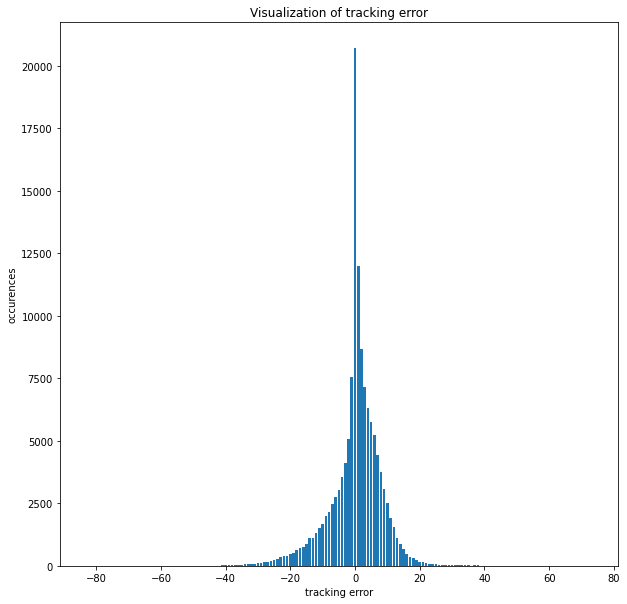

In [8]:
plt.figure(figsize=(10,10))
tracking_error = round(y_pred-y_test)
plt.bar(tracking_error.value_counts().index, tracking_error.value_counts())
plt.title("Visualization of tracking error")
plt.xlabel("tracking error")
plt.ylabel("occurences")

In [9]:
df_combined = [tracking_error, y_test]
df_tracking_error = pd.concat( df_combined,axis=1,ignore_index=True)
df_tracking_error.columns = ["tracking_error", "y_test"]

tracking_error0_10 = df_tracking_error.loc[df_tracking_error["y_test"]<=10, "tracking_error"]
tracking_error10_20= df_tracking_error.loc[((df_tracking_error["y_test"]<=20) & (df_tracking_error["y_test"] > 10)), "tracking_error"]
tracking_error20_30= df_tracking_error.loc[((df_tracking_error["y_test"]<=30) & (df_tracking_error["y_test"] > 20)), "tracking_error"]
tracking_error30_40= df_tracking_error.loc[((df_tracking_error["y_test"]<=40) & (df_tracking_error["y_test"] > 30)), "tracking_error"]
tracking_error40_50= df_tracking_error.loc[((df_tracking_error["y_test"]<=50) & (df_tracking_error["y_test"] > 40)), "tracking_error"]
tracking_error50_60= df_tracking_error.loc[((df_tracking_error["y_test"]<=60) & (df_tracking_error["y_test"] > 50)), "tracking_error"]
tracking_error60_70= df_tracking_error.loc[((df_tracking_error["y_test"]<=70) & (df_tracking_error["y_test"] > 60)), "tracking_error"]
tracking_error70_80= df_tracking_error.loc[((df_tracking_error["y_test"]<=80) & (df_tracking_error["y_test"] > 70)), "tracking_error"]
tracking_error80_90= df_tracking_error.loc[((df_tracking_error["y_test"]<=90) & (df_tracking_error["y_test"] > 80)), "tracking_error"]
tracking_error90_100= df_tracking_error.loc[df_tracking_error["y_test"]>90, "tracking_error"]


Text(0, 0.5, 'mean tracking error')

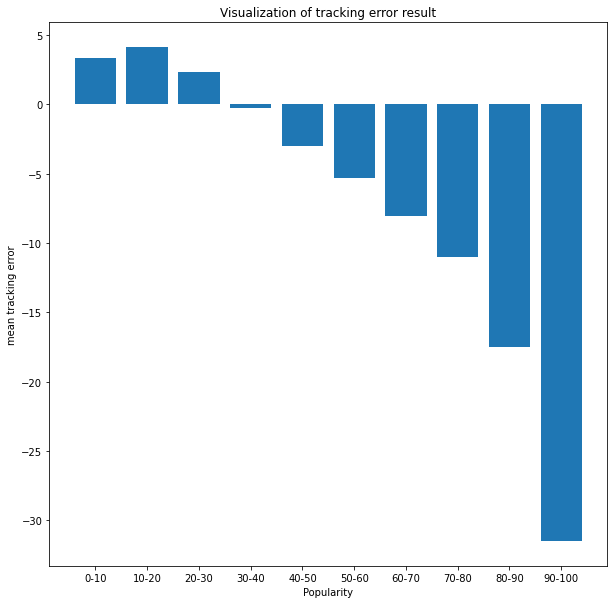

In [10]:
plt.figure(figsize=(10,10))
list_tracking_error = [tracking_error0_10.mean(), tracking_error10_20.mean(), tracking_error20_30.mean(), tracking_error30_40.mean(), tracking_error40_50.mean(),
                      tracking_error50_60.mean(), tracking_error60_70.mean(), tracking_error70_80.mean(), tracking_error80_90.mean(), tracking_error90_100.mean()]

plt.bar(["0-10", "10-20", "20-30", "30-40", "40-50","50-60", "60-70", "70-80", "80-90", "90-100"], list_tracking_error)
plt.title("Visualization of tracking error result")
plt.xlabel("Popularity")
plt.ylabel("mean tracking error")